In [7]:
from sklearn.datasets import  load_iris
from IPython.display import clear_output

iris_data = load_iris()

In [4]:
import pandas as pd

iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
#학습데이터 출력해보기
iris_data
clear_output

<function IPython.core.display_functions.clear_output(wait=False)>

In [12]:
x_train = iris_data.data[0:120] #총 데이터의 90%(4/5)를 학습데이터 인스턴스에 할당
x_test = iris_data.data[120:] #나머지를 테스트데이터 인스턴스에 할당
len(iris_data.data) #총 150개가 나왔으므로 5로 나눠 할당

150

In [13]:
y_train = iris_data.target[0:120] #총 레이블 데이터의 4/5를 학습데이터 인스턴스에 할당
y_test = iris_data.target[120:]

In [14]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
y_test #데이터의 불균형이 왔다는 것을 확인 0,1,2가 균등하게 배분되지 않았음

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

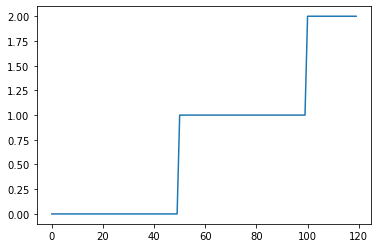

In [18]:
import matplotlib.pyplot as plt

plt.plot(y_train)
plt.show() #0과 1이 많고 2의 분포가 적다는 것을알 수 있음

### train_test_split 함수 사용하기
#### from sklearn.model_selection import train_test_split -> 임포트하는 법
참고 : 매개변수 - Parameter , 인자값 - Argument
test_size : 전체 데이터에서 데이터 세트 크기를 얼마로 샘플링할건가(디폴트는 0.25)
train_size : 테스트사이즈 파라미터를 주로 활용하기 때문에, trian_size는 잘 사용하지 않음
shuffle : 데이터 분리 전 데이터를 미리 섞을지 결정. 디폴트는 True(섞음) 데이터 분산을 통해 효율적 데이터 세트 생성 가능
random_state : 호출할 때마다 동일 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값 (고유 값 설정)
train_test_split()은 호출시 무작위 데이터 분리이기 때문에 random_state 미지정시 수행할때마다 다른 학습/테스트 데이터 생성

리스트로 리턴하며 학습데이터 - > 테스트데이터 순으로 할당


In [30]:
from sklearn.model_selection import train_test_split
# 기본 데이터가 리스트 형태에, 인덱스 내 4개의 값이 있기 때문에 할당도 4개로
X_train,X_test,y_train,y_test = train_test_split(iris_data.data, iris_data.target, 
                                                test_size = 0.3, random_state = 121)

## DecisionTreeClassifier에 대해
### 머신러닝을 위해 DecisionTree를 활용한다
#DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

여기에서는 붓꽃 데이터 셋(iris data)을 이용하며, 이 붓꽃은 크게 3개의 유형으로 나뉨
따라서 적절한 러닝학습법은 분류(Classification) 시키는 것 -> DecisionTreeClassifier 
(만약 회귀라면 Regrssion이라는 클래스를 사용)
그리고 어떠 알고리즘을 적용시킬 것인가 관건

함수의 ()내 매개변수는 max_depth와 같은 키워드 파라미터가 있는데
알고리즘에서는 이를 'Hyper Parameter'라 부르며 이 하이퍼 파라미터를 조정하여 결과를 추적

#### 따라서 모델의 예측력을 향상은 1)Feature와 Label의 조정과 2)하이퍼 파라미터의 조정을 통해 이루어짐!


## sklearn.metrics.accuracy_score
accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
true -> 레이블 데이터, pred -> 예측값(테스트 데이터 기반)


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# 원본데이터로 학습 시킨 후 원본과 비교
iris = load_iris()
dt_clf = DecisionTreeClassifier(max_depth=2)
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

pred = dt_clf.predict(train_data)
print('예측 정확도: ', accuracy_score(train_label, pred))

예측 정확도:  0.96


In [57]:
dt_clf = DecisionTreeClassifier(max_depth=2, random_state=121)
iris_data = load_iris()

X_train,X_test,y_train,y_test = train_test_split(iris_data.data, iris_data.target, 
                                                test_size = 0.3, random_state = 121)

In [58]:
dt_clf.fit(X_train, y_train) #학습 시작
pred =dt_clf.predict(X_test)  #테스트 데이터를 파라미터로 새로운 예측 시작
print(f'예측정확도 :{accuracy_score(y_test,pred)}') #예측한 값과, 테스트 레이블과 비교

예측정확도 :0.9333333333333333


## Overfitting과 Underfitting
1. 과한 학습을 시켜 train 데이터와 거의 동일하게 학습을 시킨 경우, 해당 데이터를 넘는 test data가 속성으로 들어왔을 때 예측 정확도가 오히려 떨어질 수 있음 이를 Overfitting(과적합)이라고 한다

2. 반대로 학습을 너무 적게하는 것 또한 예측력이 떨어져 Underfitting이 일어날 수 있다

데이터(피처)의 양을 조절, 학습의 양을 조절, 알고리즘의 하이퍼파라미터 조정 등이 있음


### 중첩(fold) - 테스트 데이터에 가기 전 과적합을 피하는 방법
이 중 train data의 학습과 더불어서 Validation(검증) 
즉, 훈련에 대한 검증을 통해 과적합을 방지할 수 있다

검증을 위한 검증 데이터 셋은 '중첩'하여 만든다
1) 학습데이터를 k개의 조각으로 나눔
2) k개로 조각된 train data의 1개를 검증데이터로 사용, 나머지 (K-1) 개를 학습데이터로 사용
3) 따라서 각각의 조각들을 한번씩 검증데이터로 사용하여 교차검증을 진행하는 것
4) 이 k개의 조각을 fold라 하며 k차 검증 즉, K fold(중첩)을 통해 훈련과정에서 과적합을 피할 수 있음
5) '검증'은 테스트 단계가 아닌 train 단계에서 일어나는 것
6) --> K fold cross validation